import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb

In [204]:
csv_city = "../Week-05-Matplotlib/Instructions/Pyber/raw_data/city_data.csv"
csv_ride = "../Week-05-Matplotlib/Instructions/Pyber/raw_data/ride_data.csv"

city_df = pd.read_csv(csv_city)
ride_df = pd.read_csv(csv_ride)

# Output File Names
file_output_city_csv = "generated_data/city_data.csv"
file_output_rides_csv = "generated_data/ride_data.csv"

In [205]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [156]:
city_count = len(city_df["city"])
city_count
#There are 126 cities

126

In [153]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [221]:
pyber_df = pd.merge(city_df, ride_df, on = "city", how = "outer")
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [154]:
num_rides = len(ride_df["ride_id"])
num_rides
#There are 2375 rides

2375

In [93]:
#Check information from df
drivers = city_df["driver_count"].sum()
drivers

3349

In [94]:
avg_fare = ride_df["fare"].mean()
avg_fare

26.80055157894731

In [109]:
ride_type = city_df.groupby(["type"])
ride_type.describe()

driver_count                                                     
                count       mean        std  min    25%   50%    75%   max
type                                                                      
Rural            18.0   5.777778   2.579456  3.0   3.00   6.0   7.75  10.0
Suburban         42.0  15.190476   7.651680  1.0   9.00  16.0  21.00  27.0
Urban            66.0  39.500000  21.726446  4.0  20.25  43.0  59.50  73.0

In [124]:
#Driver by city type calcs
driver_rural = sum(city_df["driver_count"].loc[city_df["type"] == "Rural"])
driver_rural

104

In [126]:
driver_suburban = sum(city_df["driver_count"].loc[city_df["type"] == "Suburban"])
driver_suburban

638

In [127]:
driver_urban = sum(city_df["driver_count"].loc[city_df["type"] == "Urban"])
driver_urban

2607

In [241]:
pyber_urban_df = pyber_df.loc[pyber_df["type"] == "Urban"]
pyber_suburban_df = pyber_df.loc[pyber_df["type"] == "Suburban"]
pyber_rural_df = pyber_df.loc[pyber_df["type"] == "Rural"]

pyber_urban_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [229]:
pyber_urban_city_df = pyber_urban_df.groupby(["city"])
average_fare_per_urban_city = pyber_urban_city_df["fare"].mean()
total_rides_per_urban_city = pyber_urban_city_df["ride_id"].count()

pyber_suburban_city_df = pyber_suburban_df.groupby(["city"])
average_fare_per_suburban_city = pyber_suburban_city_df["fare"].mean()
total_rides_per_suburban_city = pyber_suburban_city_df["ride_id"].count()

pyber_rural_city_df = pyber_rural_df.groupby(["city"])
average_fare_per_rural_city = pyber_rural_city_df["fare"].mean()
total_rides_per_rural_city = pyber_rural_city_df["ride_id"].count()

In [243]:
urban_drivers = pyber_urban_df.groupby("city")["driver_count"].sum()
suburban_drivers = pyber_suburban_df.groupby("city")["driver_count"].sum()
rural_drivers = pyber_rural_df.groupby("city")["driver_count"].sum()

In [244]:
urban_city_calcs_df = pd.DataFrame({"Average Fare ($) Per City": average_fare_per_urban_city,
                                    "Total Rides Per City": total_rides_per_urban_city,
                                    "Total Drivers Per City": urban_drivers
                                   },
                                   columns = ["Average Fare ($) Per City", "Total Rides Per City", "Total Drivers Per City"]
                                  )
suburban_city_calcs_df = pd.DataFrame({"Average Fare ($) Per City": average_fare_per_suburban_city,
                                    "Total Rides Per City": total_rides_per_suburban_city,
                                    "Total Drivers Per City": suburban_drivers
                                   },
                                   columns = ["Average Fare ($) Per City", "Total Rides Per City", "Total Drivers Per City"]
                                  )

rural_city_calcs_df = pd.DataFrame({"Average Fare ($) Per City": average_fare_per_rural_city,
                                    "Total Rides Per City": total_rides_per_rural_city,
                                    "Total Drivers Per City": rural_drivers
                                   },
                                   columns = ["Average Fare ($) Per City", "Total Rides Per City", "Total Drivers Per City"]
                                  )

urban_city_calcs_df.head()

,Average Fare ($) Per City,Total Rides Per City,Total Drivers Per City
city,,,
Alvarezhaven,23.928710,31,651
Alyssaberg,20.609615,26,1742
Antoniomouth,23.625000,22,462
Aprilchester,21.981579,19,931
Arnoldview,25.106452,31,1271


In [217]:
urban_city_calcs_df ["City Type (Urban, Suburban, Rural)"] = "Urban"
suburban_city_calcs_df ["City Type (Urban, Suburban, Rural)"] = "Suburban"
rural_city_calcs_df ["City Type (Urban, Suburban, Rural)"] = "Rural"

In [247]:
total_city_calcs_df = urban_city_calcs_df
total_city_calcs_df = total_city_calcs_df.append(suburban_city_calcs_df) 
total_city_calcs_df = total_city_calcs_df.append(rural_city_calcs_df) 
total_city_calcs_df.head()


,Average Fare ($) Per City,Total Rides Per City,Total Drivers Per City
city,,,
Alvarezhaven,23.928710,31,651
Alyssaberg,20.609615,26,1742
Antoniomouth,23.625000,22,462
Aprilchester,21.981579,19,931
Arnoldview,25.106452,31,1271


In [248]:
bubble_chart_df = total_city_calcs_df

In [191]:
#Add driver count to ride_df
driver_counts = city_df.set_index('city')['driver_count'].to_dict()
driver_counts

{'Alvarezhaven': 21,
 'Alyssaberg': 67,
 'Anitamouth': 16,
 'Antoniomouth': 21,
 'Aprilchester': 49,
 'Arnoldview': 41,
 'Campbellport': 26,
 'Carrollbury': 4,
 'Carrollfort': 55,
 'Clarkstad': 21,
 'Conwaymouth': 18,
 'Davidtown': 73,
 'Davistown': 25,
 'East Cherylfurt': 9,
 'East Douglas': 12,
 'East Erin': 43,
 'East Jenniferchester': 22,
 'East Leslie': 9,
 'East Stephen': 6,
 'East Troybury': 3,
 'Edwardsbury': 11,
 'Erikport': 3,
 'Eriktown': 15,
 'Floresberg': 7,
 'Fosterside': 69,
 'Hernandezshire': 10,
 'Horneland': 8,
 'Jacksonfort': 6,
 'Jacobfort': 52,
 'Jasonfort': 25,
 'Jeffreyton': 8,
 'Johnland': 13,
 'Kellershire': 51,
 'Kelseyland': 63,
 'Kennethburgh': 3,
 'Kimberlychester': 13,
 'Kinghaven': 3,
 'Kyleton': 12,
 'Lake Brenda': 24,
 'Lake Jeffreyland': 15,
 'Lake Jennaton': 65,
 'Lake Sarashire': 8,
 'Lake Stevenbury': 63,
 'Lisatown': 47,
 'Lisaville': 66,
 'Manuelchester': 7,
 'Martinmouth': 5,
 'Maryside': 20,
 'Matthewside': 4,
 'Mooreview': 34,
 'New Aaron': 60,

In [186]:
driver_df1 = ride_df['city'].map(driver_counts)
driver_df1.head()

0    46
1    35
2    55
3    68
4     8
Name: city, dtype: int64

In [187]:
#Add city type to ride_df
city_type = city_df.set_index('city')['type'].to_dict()
city_type

{'Alvarezhaven': 'Urban',
 'Alyssaberg': 'Urban',
 'Anitamouth': 'Suburban',
 'Antoniomouth': 'Urban',
 'Aprilchester': 'Urban',
 'Arnoldview': 'Urban',
 'Campbellport': 'Suburban',
 'Carrollbury': 'Suburban',
 'Carrollfort': 'Urban',
 'Clarkstad': 'Suburban',
 'Conwaymouth': 'Suburban',
 'Davidtown': 'Urban',
 'Davistown': 'Urban',
 'East Cherylfurt': 'Suburban',
 'East Douglas': 'Urban',
 'East Erin': 'Urban',
 'East Jenniferchester': 'Suburban',
 'East Leslie': 'Rural',
 'East Stephen': 'Rural',
 'East Troybury': 'Rural',
 'Edwardsbury': 'Urban',
 'Erikport': 'Rural',
 'Eriktown': 'Urban',
 'Floresberg': 'Suburban',
 'Fosterside': 'Urban',
 'Hernandezshire': 'Rural',
 'Horneland': 'Rural',
 'Jacksonfort': 'Rural',
 'Jacobfort': 'Urban',
 'Jasonfort': 'Suburban',
 'Jeffreyton': 'Suburban',
 'Johnland': 'Suburban',
 'Kellershire': 'Urban',
 'Kelseyland': 'Urban',
 'Kennethburgh': 'Rural',
 'Kimberlychester': 'Urban',
 'Kinghaven': 'Rural',
 'Kyleton': 'Suburban',
 'Lake Brenda': 'Subu

In [137]:
ride_df1 = ride_df['city'].map(city_type)
ride_df1.head()

0    Urban
1    Urban
2    Urban
3    Urban
4    Urban
Name: city, dtype: object

In [189]:
city2 = ride_df["city"]
fare = ride_df["fare"]
ride = ride_df["ride_id"]

df_rides = pd.DataFrame({"City": city2,
                           "Fare": fare,
                             "Type":ride_df1,
                             "Driver_Count":driver_df1,
                             "Ride_id": ride},
                           columns = ["City", "Fare", "Type", "Driver_Count", "Ride_id"])
df_rides.head()

,City,Fare,Type,Driver_Count,Ride_id
0,Sarabury,38.35,Urban,46,5403689035038
1,South Roy,17.49,Urban,35,4036272335942
2,Wiseborough,44.18,Urban,55,3645042422587
3,Spencertown,6.87,Urban,68,2242596575892
4,Nguyenbury,6.28,Urban,8,1543057793673


In [160]:
#Ride number calcs
fare_rural = len(df_rides["Ride_id"].loc[df_rides["Type"] == "Rural"])
fare_rural

125

In [161]:
fare_suburban = len(df_rides["Ride_id"].loc[df_rides["Type"] == "Suburban"])
fare_suburban

625

In [162]:
fare_urban = len(df_rides["Ride_id"].loc[df_rides["Type"] == "Urban"])
fare_urban

1625

In [157]:
#Easier method for fare calcs
#This is avg fare cost per city type, not total fares per city type. Important distinction
group_type = df_rides.groupby(["Type"])
group_type.mean()

,Fare,Ride_id
Type,,
Rural,34.040720,5.269835e+12
Suburban,30.908608,4.810247e+12
Urban,24.663594,4.855504e+12


In [165]:
#Calc total fare per city type
rural_tot_fares = fare_rural * 34.04
rural_tot_fares

4255.0

In [166]:
suburban_tot_fares = fare_suburban * 30.91
suburban_tot_fares

19318.75

In [167]:
urban_tot_fares = fare_urban * 24.66
urban_tot_fares

40072.5

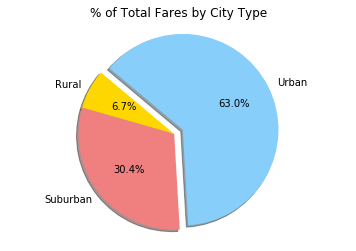

In [169]:
# Pie Chart % of Total Fares by City Type
#this is fare cost by city type. Not total value of fares by city type
labels = ["Rural", "Suburban", "Urban"]
sizes = [4255, 19318.75, 40072.5]
colors = ["Gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

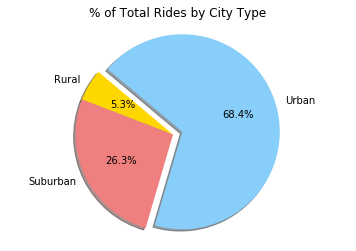

In [192]:
#Pie Chart % of Total Rides by City Type

labels = ["Rural", "Suburban", "Urban"]
sizes = [125, 625, 1625]
colors = ["Gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

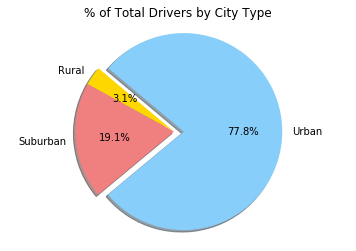

In [128]:
#Pie Chart  % of Total Drivers by City Type
#Drivers
labels = ["Rural", "Suburban", "Urban"]
sizes = [104, 638, 2607]
colors = ["Gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()

26.80055157894731

In [ ]:
data = [random.random() for value in x_axis]
data1 = [random.random() for value in y_axis] 
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

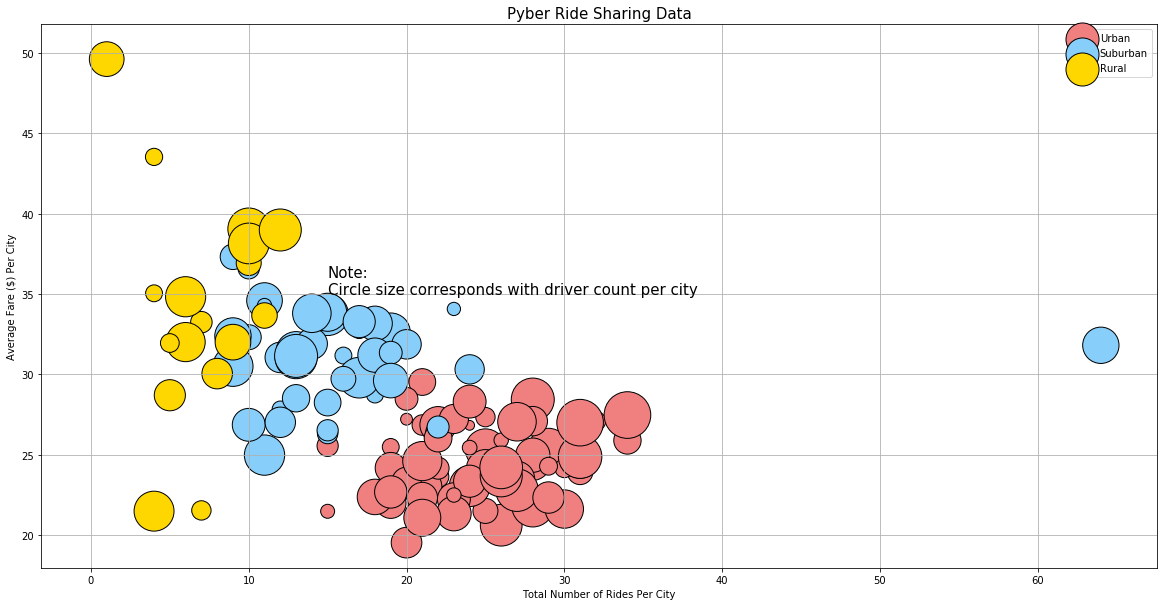

In [250]:
# Code for the bubble plot

# First create the main plot where we start with the urban city dataframe
main_plot = urban_city_calcs_df.plot(kind='scatter', x= 'Total Rides Per City', 
                         y= "Average Fare ($) Per City", color = "lightcoral",edgecolors="black", 
                         grid=True,  figsize=(20,10), s=total_city_calcs_df["Total Drivers Per City"],  
                         legend = True, label = "Urban"
                        )

# Now we append suburban city dataframe to the main plot - via qualifier 'ax = main_plot'
suburban_city_calcs_df.plot(kind='scatter', x= 'Total Rides Per City', 
                         y= "Average Fare ($) Per City", color = "lightskyblue",edgecolors="black", 
                         grid=True, figsize=(20,10),  s=total_city_calcs_df["Total Drivers Per City"],  
                         legend = True, label = "Suburban", ax = main_plot
                        )

# Now we again append rural city dataframe to the main plot - again via qualifier 'ax = main_plot'
rural_city_calcs_df.plot(kind='scatter', x= 'Total Rides Per City', 
                         y= "Average Fare ($) Per City", color = "gold",edgecolors="black", 
                         grid=True, figsize=(20,10),  s=total_city_calcs_df["Total Drivers Per City"],  
                         legend = True, label = "Rural", ax = main_plot,
                        )

# Printing the labels and titles with their respective font sizes
plt.xlabel('Total Number of Rides Per City', fontsize = 10)
plt.ylabel("Average Fare ($) Per City", fontsize = 10)
plt.title("Pyber Ride Sharing Data", fontsize = 15)

# Printing annotation text with its respective font size
plt.annotate(s='Note:\nCircle size corresponds with driver count per city',xy= (0,30), xytext=(15,35), fontsize = 15)

# Show the plot
plt.show()